In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

print "before normalization : ", dataset[:5]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print "after normalization : ", dataset[:5]

before normalization :  [[ 112.]
 [ 118.]
 [ 132.]
 [ 129.]
 [ 121.]]
after normalization :  [[ 0.01544401]
 [ 0.02702703]
 [ 0.05405405]
 [ 0.04826255]
 [ 0.03281853]]


In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape, testX.shape

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print trainX.shape, testX.shape

 (94, 1) (46, 1)
(94, 1, 1) (46, 1, 1)


In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0321
Epoch 2/100
0s - loss: 0.0147
Epoch 3/100
0s - loss: 0.0116
Epoch 4/100
0s - loss: 0.0106
Epoch 5/100
0s - loss: 0.0097
Epoch 6/100
0s - loss: 0.0089
Epoch 7/100
0s - loss: 0.0082
Epoch 8/100
0s - loss: 0.0074
Epoch 9/100
0s - loss: 0.0065
Epoch 10/100
0s - loss: 0.0058
Epoch 11/100
0s - loss: 0.0052
Epoch 12/100
0s - loss: 0.0045
Epoch 13/100
0s - loss: 0.0040
Epoch 14/100
0s - loss: 0.0034
Epoch 15/100
0s - loss: 0.0031
Epoch 16/100
0s - loss: 0.0028
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0023
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0021
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0020
Epoch 31/100
0s - loss: 0.0021
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.57 RMSE
Test Score: 51.02 RMSE


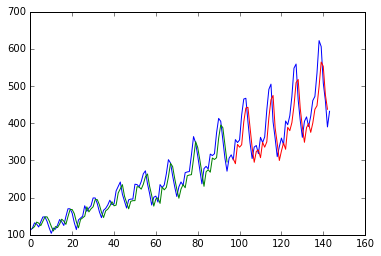

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [15]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape, testX.shape

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print trainX.shape, testX.shape

(92, 3) (44, 3)
(92, 1, 3) (44, 1, 3)


In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0175
Epoch 2/100
0s - loss: 0.0084
Epoch 3/100
0s - loss: 0.0078
Epoch 4/100
0s - loss: 0.0071
Epoch 5/100
0s - loss: 0.0067
Epoch 6/100
0s - loss: 0.0064
Epoch 7/100
0s - loss: 0.0060
Epoch 8/100
0s - loss: 0.0058
Epoch 9/100
0s - loss: 0.0056
Epoch 10/100
0s - loss: 0.0054
Epoch 11/100
0s - loss: 0.0053
Epoch 12/100
0s - loss: 0.0051
Epoch 13/100
0s - loss: 0.0051
Epoch 14/100
0s - loss: 0.0050
Epoch 15/100
0s - loss: 0.0048
Epoch 16/100
0s - loss: 0.0046
Epoch 17/100
0s - loss: 0.0050
Epoch 18/100
0s - loss: 0.0047
Epoch 19/100
0s - loss: 0.0044
Epoch 20/100
0s - loss: 0.0046
Epoch 21/100
0s - loss: 0.0043
Epoch 22/100
0s - loss: 0.0043
Epoch 23/100
0s - loss: 0.0044
Epoch 24/100
0s - loss: 0.0043
Epoch 25/100
0s - loss: 0.0041
Epoch 26/100
0s - loss: 0.0040
Epoch 27/100
0s - loss: 0.0039
Epoch 28/100
0s - loss: 0.0039
Epoch 29/100
0s - loss: 0.0039
Epoch 30/100
0s - loss: 0.0038
Epoch 31/100
0s - loss: 0.0038
Epoch 32/100
0s - loss: 0.0037
Epoch 33/100
0s -

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.72 RMSE
Test Score: 55.14 RMSE


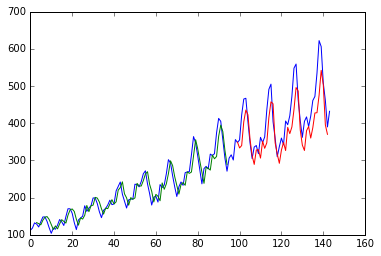

In [18]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape, testX.shape

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print trainX.shape, testX.shape

(92, 3) (44, 3)
(92, 3, 1) (44, 3, 1)


Epoch 1/100
2s - loss: 0.0170
Epoch 2/100
0s - loss: 0.0078
Epoch 3/100
0s - loss: 0.0058
Epoch 4/100
0s - loss: 0.0048
Epoch 5/100
0s - loss: 0.0041
Epoch 6/100
0s - loss: 0.0039
Epoch 7/100
0s - loss: 0.0037
Epoch 8/100
0s - loss: 0.0036
Epoch 9/100
0s - loss: 0.0036
Epoch 10/100
0s - loss: 0.0035
Epoch 11/100
0s - loss: 0.0035
Epoch 12/100
0s - loss: 0.0036
Epoch 13/100
0s - loss: 0.0036
Epoch 14/100
0s - loss: 0.0034
Epoch 15/100
0s - loss: 0.0035
Epoch 16/100
0s - loss: 0.0034
Epoch 17/100
0s - loss: 0.0034
Epoch 18/100
0s - loss: 0.0035
Epoch 19/100
0s - loss: 0.0034
Epoch 20/100
0s - loss: 0.0033
Epoch 21/100
0s - loss: 0.0036
Epoch 22/100
0s - loss: 0.0034
Epoch 23/100
0s - loss: 0.0034
Epoch 24/100
0s - loss: 0.0033
Epoch 25/100
0s - loss: 0.0034
Epoch 26/100
0s - loss: 0.0033
Epoch 27/100
0s - loss: 0.0033
Epoch 28/100
0s - loss: 0.0033
Epoch 29/100
0s - loss: 0.0033
Epoch 30/100
0s - loss: 0.0032
Epoch 31/100
0s - loss: 0.0033
Epoch 32/100
0s - loss: 0.0032
Epoch 33/100
0s -

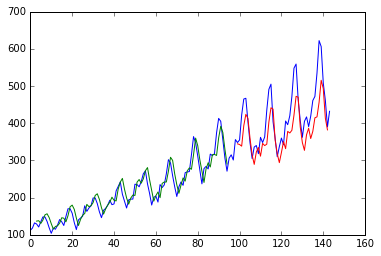

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
2s - loss: 0.0071
Epoch 1/1
0s - loss: 0.0098
Epoch 1/1
0s - loss: 0.0066
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0036
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0035
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0034
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0033
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0032
Epoch 1/1
0s - loss: 0.0031
Epoch 1/1
0s - loss:

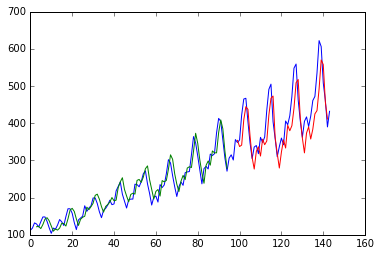

In [23]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
3s - loss: 0.0117
Epoch 1/1
1s - loss: 0.0199
Epoch 1/1
1s - loss: 0.0072
Epoch 1/1
1s - loss: 0.0058
Epoch 1/1
1s - loss: 0.0052
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0050
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0049
Epoch 1/1
1s - loss: 0.0048
Epoch 1/1
1s - loss: 0.0048
Epoch 1/1
1s - loss: 0.0047
Epoch 1/1
1s - loss: 0.0047
Epoch 1/1
1s - loss: 0.0047
Epoch 1/1
1s - loss: 0.0046
Epoch 1/1
1s - loss: 0.0046
Epoch 1/1
1s - loss: 0.0046
Epoch 1/1
1s - loss: 0.0046
Epoch 1/1
1s - loss: 0.0045
Epoch 1/1
1s - loss: 0.0045
Epoch 1/1
1s - loss: 0.0045
Epoch 1/1
1s - loss: 0.0044
Epoch 1/1
1s - loss: 0.0044
Epoch 1/1
1s - loss: 0.0044
Epoch 1/1
1s - loss: 0.0043
Epoch 1/1
1s - loss: 0.0043
Epoch 1/1
1s - loss: 0.0043
Epoch 1/1
1s - loss: 0.0042
Epoch 1/1
1s - loss: 0.0042
Epoch 1/1
1s - loss: 0.0042
Epoch 1/1
1s - loss:

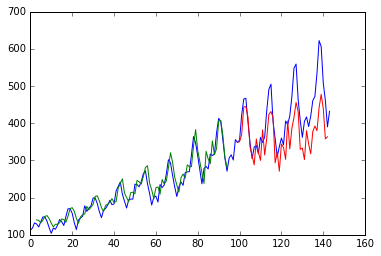

In [24]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()